environemnt: spatial_ced_2

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:532: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left = partial(_left_join_spatialelement_table)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:533: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left_exclusiv

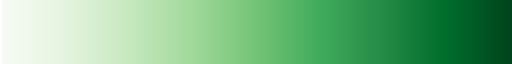

In [1]:
import spatialdata as sd
import spatialdata_io  
import spatialdata_plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pdc
import scanpy as sc
import os
import sys
import matplotlib.patches as patches
import math
from matplotlib.colors import ListedColormap
import seaborn as sns
from datetime import datetime
from PIL import Image, ImageEnhance
import pandas as pd
import shutil
import session_info2
from scipy.sparse import issparse


from spatialdata.transformations import (
    Affine,
    MapAxis,
    Scale,
    Sequence,
    Translation,
    get_transformation,
    set_transformation,
)

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # to edit text in Illustrator
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams.update({
    "font.size": 14,    
    "axes.titlesize": 16,    
    "axes.labelsize": 14,  
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,  
    "legend.fontsize": 14
})

def create_cmap_with_alpha(base_cmap, alpha=0.5, name=None, max_frac = 1):
    cmap = set_zero_in_cmap_to_transparent(cmap=base_cmap).copy()
    colors = cmap(np.arange(cmap.N))
    colors[:, -1] = alpha

    selected_idx = range(int(len(colors)*max_frac))
    colors = colors[selected_idx, :]

    cmap_with_alpha = ListedColormap(colors, name=name or f"{base_cmap}_with_alpha")
    return set_zero_in_cmap_to_transparent(cmap=cmap_with_alpha).copy()

from spatialdata_plot.pl.utils import set_zero_in_cmap_to_transparent
new_cmap_greens = set_zero_in_cmap_to_transparent(cmap="Greens")
new_cmap_greens

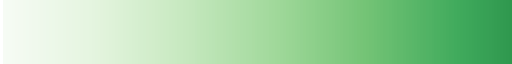

In [2]:
new_cmap_greens_alpha = create_cmap_with_alpha("Greens", alpha=1, max_frac=0.7)
new_cmap_greens_alpha

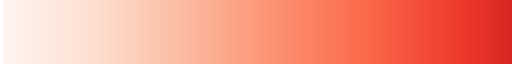

In [3]:
new_cmap_reds_alpha = create_cmap_with_alpha("Reds", alpha=1, max_frac = 0.7)
new_cmap_reds_alpha

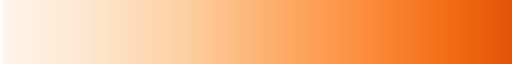

In [4]:
new_cmap_oranges_alpha = create_cmap_with_alpha("Oranges", alpha=1, max_frac = 0.7)
new_cmap_oranges_alpha

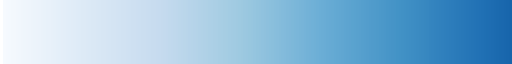

In [5]:
new_cmap_blue_alpha = create_cmap_with_alpha("Blues", alpha=1, max_frac= 0.8)
new_cmap_blue_alpha

In [6]:
# if /figures/fig3/ doesnt exist - create it
fig2_save_path = os.getcwd()+"/figures/fig2/"
if not os.path.exists(fig2_save_path):
    os.makedirs(fig2_save_path)

fig4_save_path = os.getcwd()+"/figures/fig4/"
if not os.path.exists(fig4_save_path):
    os.makedirs(fig4_save_path)

supp_met_save_path = os.getcwd()+"/figures/supp_metaplasia/"
if not os.path.exists(supp_met_save_path):
    os.makedirs(supp_met_save_path)

## Load data

In [7]:
ced1_path = "/mnt/x/Common/Joint_projects/spatial_celiac/visiumhd_experiment1/5_outs/CeD/"
ct_path = "/mnt/x/Common/Joint_projects/spatial_celiac/visiumhd_experiment1/5_outs/CT/"

In [8]:
ct_path_08 = ct_path+"/binned_outputs/square_008um/"
scalefactor_path = ct_path_08+"/spatial/scalefactors_json.json"
scalefactors_ct = pd.read_json(scalefactor_path, typ='series')
scalefactors_ct

spot_diameter_fullres          24.870939
bin_size_um                     8.000000
microns_per_pixel               0.321661
tissue_lowres_scalef            0.028338
fiducial_diameter_fullres    1025.926237
tissue_hires_scalef             0.283380
regist_target_img_scalef        0.283380
dtype: float64

In [9]:
ced1_path_08 = ced1_path+"/binned_outputs/square_008um/"
scalefactor_path = ced1_path_08+"/spatial/scalefactors_json.json"
scalefactors = pd.read_json(scalefactor_path, typ='series')
scalefactors

spot_diameter_fullres          24.842091
bin_size_um                     8.000000
microns_per_pixel               0.322034
tissue_lowres_scalef            0.026256
fiducial_diameter_fullres    1024.736274
tissue_hires_scalef             0.262559
regist_target_img_scalef        0.262559
dtype: float64

In [10]:
fullres_path = "/mnt/x/Common/Joint_projects/spatial_celiac/visiumhd_experiment1/4_files_for_processing/brightened_Celiac_slide2-6_merged_celiac_slide2-6_ch00.tif"
folder_path = ct_path
# create spatialdata object
sdata_ct = spatialdata_io.visium_hd(folder_path, fullres_image_file=fullres_path, dataset_id='CT')

for table in sdata_ct.tables.values():
    table.var_names_make_unique()

sdata_ct

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


SpatialData object
├── Images
│     ├── 'CT_full_image': DataTree[cyx] (3, 21089, 21173), (3, 10544, 10586), (3, 5272, 5293), (3, 2636, 2646), (3, 1318, 1323)
│     ├── 'CT_hires_image': DataArray[cyx] (3, 5976, 6000)
│     └── 'CT_lowres_image': DataArray[cyx] (3, 598, 600)
├── Shapes
│     ├── 'CT_square_002um': GeoDataFrame shape: (3177000, 1) (2D shapes)
│     ├── 'CT_square_008um': GeoDataFrame shape: (198623, 1) (2D shapes)
│     └── 'CT_square_016um': GeoDataFrame shape: (50391, 1) (2D shapes)
└── Tables
      ├── 'square_002um': AnnData (3177000, 18085)
      ├── 'square_008um': AnnData (198623, 18085)
      └── 'square_016um': AnnData (50391, 18085)
with coordinate systems:
    ▸ 'CT', with elements:
        CT_full_image (Images), CT_hires_image (Images), CT_lowres_image (Images), CT_square_002um (Shapes), CT_square_008um (Shapes), CT_square_016um (Shapes)
    ▸ 'CT_downscaled_hires', with elements:
        CT_hires_image (Images), CT_square_002um (Shapes), CT_square_008um (S

In [11]:
fullres_path = "/mnt/x/Common/Joint_projects/spatial_celiac/visiumhd_experiment1/4_files_for_processing/brightened_Celiac_slide_1-1-merged_TileScan_1_Merged_ch00.tif"
folder_path = ced1_path
# create spatialdata object
sdata = spatialdata_io.visium_hd(folder_path, fullres_image_file=fullres_path, dataset_id='CeD')

for table in sdata.tables.values():
    table.var_names_make_unique()

sdata

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


SpatialData object
├── Images
│     ├── 'CeD_full_image': DataTree[cyx] (3, 19783, 22852), (3, 9891, 11426), (3, 4945, 5713), (3, 2472, 2856), (3, 1236, 1428)
│     ├── 'CeD_hires_image': DataArray[cyx] (3, 5194, 6000)
│     └── 'CeD_lowres_image': DataArray[cyx] (3, 520, 600)
├── Shapes
│     ├── 'CeD_square_002um': GeoDataFrame shape: (3731424, 1) (2D shapes)
│     ├── 'CeD_square_008um': GeoDataFrame shape: (233214, 1) (2D shapes)
│     └── 'CeD_square_016um': GeoDataFrame shape: (59075, 1) (2D shapes)
└── Tables
      ├── 'square_002um': AnnData (3731424, 18085)
      ├── 'square_008um': AnnData (233214, 18085)
      └── 'square_016um': AnnData (59075, 18085)
with coordinate systems:
    ▸ 'CeD', with elements:
        CeD_full_image (Images), CeD_hires_image (Images), CeD_lowres_image (Images), CeD_square_002um (Shapes), CeD_square_008um (Shapes), CeD_square_016um (Shapes)
    ▸ 'CeD_downscaled_hires', with elements:
        CeD_hires_image (Images), CeD_square_002um (Shapes), CeD

### Preprocess

In [12]:
sdata_ct.tables['square_008um'].X = sc.pp.log1p(sc.pp.normalize_total(sdata_ct.tables['square_008um'], target_sum=10000, inplace=False)['X'], copy=True)
sdata_ct.tables['square_008um'].layers['log_norm'] = sdata_ct.tables['square_008um'].X.copy()

# Check if the matrix is sparse and apply the sign operation
if issparse(sdata_ct.tables['square_008um'].X):
    sdata_ct.tables['square_008um'].layers['binary'] = sdata_ct.tables['square_008um'].X.sign()
else:
    sdata_ct.tables['square_008um'].layers['binary'] = (sdata_ct.tables['square_008um'].X > 0).astype(int)

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


In [13]:
# for each gene, substract the minimum and divide by the maximum
# sdata_ct.tables['square_008um'].X = sd.pp.scale_to_unit_interval(sdata_ct.tables['square_008um'], axis=1, copy=False)['X']

In [14]:
sdata.tables['square_008um'].X = sc.pp.log1p(sc.pp.normalize_total(sdata.tables['square_008um'], target_sum=10000, inplace=False)['X'], copy=True)
sdata.tables['square_008um'].layers['log_norm'] = sdata.tables['square_008um'].X.copy()

# Check if the matrix is sparse and apply the sign operation
if issparse(sdata.tables['square_008um'].X):
    sdata.tables['square_008um'].layers['binary'] = sdata.tables['square_008um'].X.sign()
else:
    sdata.tables['square_008um'].layers['binary'] = (sdata.tables['square_008um'].X > 0).astype(int)

In [15]:
# work on binary
WORK_ON_BINARY = False
if WORK_ON_BINARY:
    sdata.tables['square_008um'].X = sdata.tables['square_008um'].layers['binary'].copy()
    sdata_ct.tables['square_008um'].X = sdata_ct.tables['square_008um'].layers['binary'].copy()
else:
    sdata.tables['square_008um'].X = sdata.tables['square_008um'].layers['log_norm'].copy()
    sdata_ct.tables['square_008um'].X = sdata_ct.tables['square_008um'].layers['log_norm'].copy()

In [16]:
def change_to_log_normalized(sdata_obj):
    sdata_obj.tables['square_008um'].X = sdata_obj.tables['square_008um'].layers['log_norm'].copy()
    return sdata_obj

In [17]:
def change_to_binary(sdata_obj):
    sdata_obj.tables['square_008um'].X = sdata_obj.tables['square_008um'].layers['binary'].copy()
    return sdata_obj

In [18]:
# bb_xmin = -17750
# bb_ymin = -7600
# bb_w = 1750
# bb_h = 2500
# bb_xmax = bb_xmin + bb_w
# bb_ymax = bb_ymin + bb_h

# cropped_sdata_ct = sdata_ct.query.bounding_box(
#     axes=["x", "y"],
#     min_coordinate=[bb_xmin, bb_ymin],
#     max_coordinate=[bb_xmax, bb_ymax],
#     target_coordinate_system="CT",
# )

# cropped_sdata_ct

## Rotate Control

In [19]:
rotated_sdata_ct = sdata_ct
theta = -(141/180) * math.pi
rotation = Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

set_transformation(rotated_sdata_ct.images['CT_full_image'], rotation, to_coordinate_system="CT")
set_transformation(rotated_sdata_ct.shapes['CT_square_008um'], rotation, to_coordinate_system="CT")

In [20]:
SHOW_FULL_HE_IMAGES = False
if SHOW_FULL_HE_IMAGES:
    rotated_sdata_ct.pl.render_images('CT_full_image').pl.show(coordinate_systems='CT')

In [21]:
bb_xmin = -11000
bb_ymin = -17000
bb_w = 3000
bb_h = 3000
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_rotated_sdata_ct = rotated_sdata_ct.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="CT",
)

cropped_rotated_sdata_ct

SpatialData object
├── Images
│     └── 'CT_full_image': DataTree[cyx] (3, 4219, 4219), (3, 2109, 2110), (3, 1055, 1055), (3, 527, 527), (3, 264, 264)
├── Shapes
│     └── 'CT_square_008um': GeoDataFrame shape: (11449, 1) (2D shapes)
└── Tables
      └── 'square_008um': AnnData (11449, 18085)
with coordinate systems:
    ▸ 'CT', with elements:
        CT_full_image (Images), CT_square_008um (Shapes)
    ▸ 'CT_downscaled_hires', with elements:
        CT_square_008um (Shapes)
    ▸ 'CT_downscaled_lowres', with elements:
        CT_square_008um (Shapes)

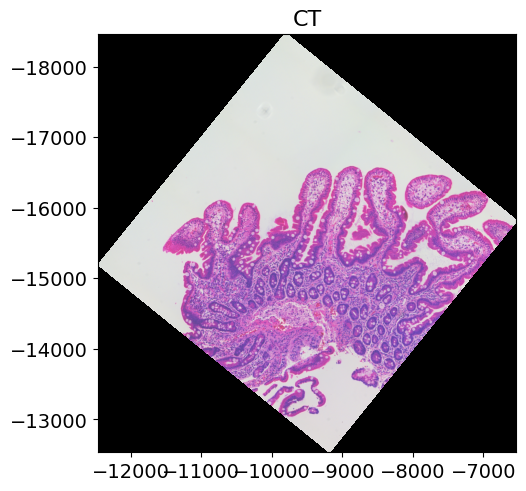

In [34]:
cropped_rotated_sdata_ct.pl.render_images('CT_full_image').pl.show(coordinate_systems='CT')

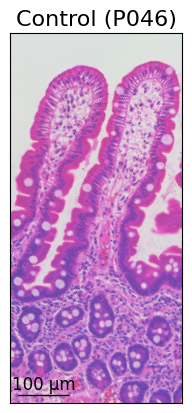

In [60]:
# Show H&E
scalebar_y = -14550
start_bar_x = -9700
scalebar_length_um = 100

fig, ax = plt.subplots(1, 1, dpi=300)
cropped_rotated_sdata_ct.pl.render_images('CT_full_image').pl.show(coordinate_systems='CT', ax=ax)

plt.xticks([])
plt.yticks([])
plt.title("Control (P046)")

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_ylim(-14500,-16750)
ax.set_xlim(-9750,-8700)

end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']

# add text label for scalebar
plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
plt.show()

In [28]:
cropped_rotated_sdata_ct = change_to_binary(cropped_rotated_sdata_ct)

### Plot two colors - control

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CT_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CT_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


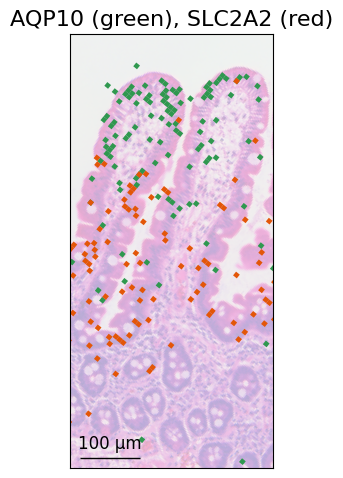

In [61]:
scalebar_y = -14550
start_bar_x = -9700
scalebar_length_um = 100

pairs_dict = {
    "AQP10_SLC2A2": {"red": "SLC2A2", "green": "AQP10"},
    # "AQP10_REG1A": {"red": "REG1A", "green": "AQP10"},
}

green_cmap = new_cmap_greens_alpha
red_cmap = new_cmap_oranges_alpha

for key, gene_pair in pairs_dict.items():
    red_gene = gene_pair['red']
    green_gene = gene_pair['green']

# red_gene = "AQP10"
# green_gene= "SLC2A2"
    image_alpha = 0.45

    fig, ax = plt.subplots(1, 1, dpi=300, figsize=(5,5))
    cropped_rotated_sdata_ct.pl.render_images('CT_full_image', alpha=image_alpha).pl.render_shapes('CT_square_008um',color=green_gene, cmap=green_cmap, method='matplotlib',).pl.render_shapes('CT_square_008um',color=red_gene, cmap=red_cmap, method='matplotlib').pl.show(coordinate_systems='CT',ax=ax, colorbar=False)
    # cropped_rotated_sdata_ct.pl.render_images('CT_full_image', alpha=image_alpha).pl.render_shapes('CT_square_008um',color=blue_gene, cmap=new_cmap_blue_alpha, method='matplotlib',).pl.render_shapes('CT_square_008um',color=red_gene, cmap=new_cmap_reds_alpha, method='matplotlib').pl.show(coordinate_systems='CT',ax=ax)
    plt.title(f"{green_gene} (green), {red_gene} (red)")

    # hide x and y ticks
    plt.xticks([])
    plt.yticks([])

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(-14500,-16750)
    ax.set_xlim(-9750,-8700)

    end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']# plt.text(start_bar_x, scalebar_y - 100, f"{scalebar_length_um} µm", color='black', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    plt.tight_layout()
    export_path = f"{fig2_save_path}/fig2_spatial_CT_{green_gene}_{red_gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

In [ ]:
# scalebar_y = -5150
# start_bar_x = -17600
# scalebar_length_um = 100

# green_gene = "SLC2A2"
# red_gene = "SLC46A1"
# blue_gene = "MUC5AC"
# image_alpha = 0.45

# fig, ax = plt.subplots(1, 1, dpi=300)
# cropped_rotated_sdata_ct.pl.render_images('CT_full_image', alpha=image_alpha).pl.render_shapes('CT_square_008um',color=green_gene, cmap=new_cmap_greens_alpha, method='matplotlib',).pl.render_shapes('CT_square_008um',color=red_gene, cmap=new_cmap_reds_alpha, method='matplotlib').pl.render_shapes('CT_square_008um',color=blue_gene, cmap=new_cmap_blue_alpha, method='matplotlib').pl.show(coordinate_systems='CT',ax=ax)
# plt.title(f"{green_gene} (green), {red_gene} (red), {blue_gene} (blue)")

# # hide x and y ticks
# plt.xticks([])
# plt.yticks([])

# end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']
# plt.text(start_bar_x, scalebar_y - 100, f"{scalebar_length_um} µm", color='black', fontsize=8, ha='left', va='top', fontweight='bold')
# plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=3, solid_capstyle='butt')
# plt.tight_layout()
# plt.show()

### Plot multiple genes - control

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CT_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


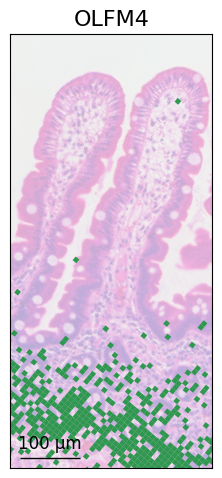

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CT_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


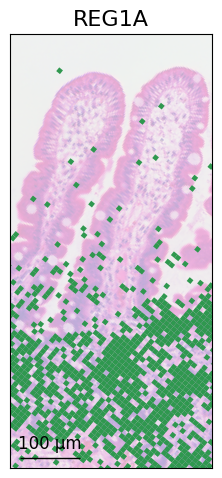

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CT_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


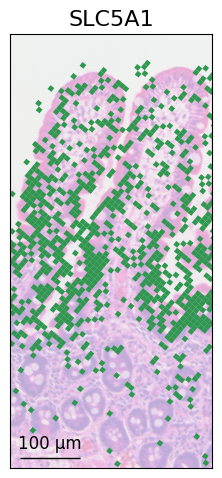

In [62]:
scalebar_y = -14550
start_bar_x = -9700
scalebar_length_um = 100
image_alpha = 0.45

genes_to_show = ["OLFM4","REG1A","SLC5A1"]
gene_replacement = {
    "OLFM4": "OLFM4",# (Crypt marker)",
    "REG1A": "REG1A",# (Villus bottom marker)",
    "SLC5A1": "SLC5A1",# (Villus mid marker)",
    "AQP10": "AQP10",# (Villus tip marker)"
}

for gene in genes_to_show:
    fig, ax = plt.subplots(1, 1, dpi=300, figsize=(5,5))
    cropped_rotated_sdata_ct.pl.render_images('CT_full_image', alpha=image_alpha).pl.render_shapes(
        'CT_square_008um',color=gene, cmap=new_cmap_greens_alpha, method='matplotlib'
        ).pl.show(coordinate_systems='CT', ax=ax, colorbar=False)
    plt.title(gene)

    # hide x and y ticks
    plt.xticks([])
    plt.yticks([])
    plt.title(gene_replacement.get(gene, gene))
    
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(-14500,-16750)
    ax.set_xlim(-9750,-8700)

    end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']# plt.text(start_bar_x, scalebar_y - 100, f"{scalebar_length_um} µm", color='black', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    plt.tight_layout()
    # export
    export_path = f"{fig2_save_path}/fig2_spatial_CT_{gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

In [35]:
if SHOW_FULL_HE_IMAGES:
    sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD')

In [36]:
# bb_xmin = 8000
# bb_ymin = 13500
# bb_w = 2100
# bb_h = 3000
# bb_xmax = bb_xmin + bb_w
# bb_ymax = bb_ymin + bb_h
# f, ax = plt.subplots(figsize=(7, 7))
# sdata.pl.render_images('CeD_full_image').pl.show(ax=ax, coordinate_systems='CeD')
# rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=3, edgecolor="red", facecolor="none")
# ax.add_patch(rect)

In [37]:
# f, ax = plt.subplots(figsize=(7, 77))
# sdata.pl.render_images('CeD_hires_image').pl.show(ax=ax, coordinate_systems='CeD_downscaled_hires')
# rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=3, edgecolor="red", facecolor="none")
# ax.add_patch(rect)

In [38]:
# f, ax = plt.subplots(figsize=(7, 77))
# sdata.pl.render_images('CeD_hires_image').pl.render_shapes('CeD_square_008um',color="MUC5AC", cmap=new_cmap_spectral).pl.show(ax=ax, coordinate_systems='CeD_downscaled_hires')

## Rotate celiac 90

In [39]:
rotated_sdata = sdata
theta = 3*math.pi / 2
rotation = Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

set_transformation(rotated_sdata.images['CeD_full_image'], rotation, to_coordinate_system="CeD")
set_transformation(rotated_sdata.shapes['CeD_square_008um'], rotation, to_coordinate_system="CeD")
if SHOW_FULL_HE_IMAGES:
    rotated_sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD')

In [40]:
bb_xmin = 14000
bb_ymin = -10500
bb_w = 4000
bb_h = 3000
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_sdata = rotated_sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="CeD",
)

if SHOW_FULL_HE_IMAGES:
    cropped_sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD')

### Plot two colors - rotate celiac 90

In [41]:
# make binary
cropped_sdata = change_to_binary(cropped_sdata)

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


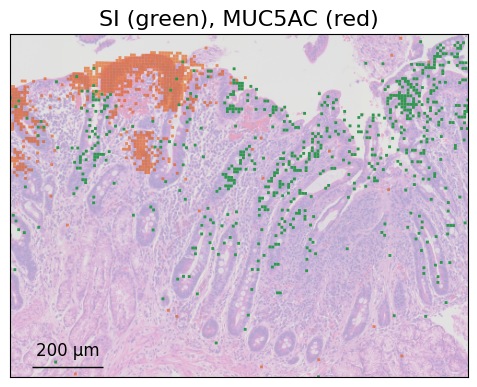

In [42]:
scalebar_y = -7600
start_bar_x = 14200
scalebar_length_um = 200

pairs_dict = {
    "AQP10_SLC2A2": {"red": "MUC5AC", "green": "SI"},
    # "AQP10_REG1A": {"red": "REG1A", "green": "AQP10"},
}

green_cmap = new_cmap_greens_alpha
red_cmap = new_cmap_oranges_alpha

for key, gene_pair in pairs_dict.items():
    red_gene = gene_pair['red']
    green_gene = gene_pair['green']

    image_alpha = 0.4

    fig, ax = plt.subplots(1, 1, dpi=300, figsize=(5,5))
    cropped_sdata.pl.render_images('CeD_full_image', alpha=image_alpha).pl.render_shapes('CeD_square_008um',color=red_gene, cmap=red_cmap, method='matplotlib',fill_alpha=0.6).pl.render_shapes('CeD_square_008um',color=green_gene, cmap=green_cmap, method='matplotlib',).pl.show(coordinate_systems='CeD',ax=ax, colorbar=False)
    plt.title(f"{green_gene} (green), {red_gene} (red)")

    # hide x and y ticks
    plt.xticks([])
    plt.yticks([])

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(-7510,-10490)
    ax.set_xlim(14010,17990)

    end_bar_x = start_bar_x + scalebar_length_um / scalefactors['microns_per_pixel']# plt.text(start_bar_x, scalebar_y - 100, f"{scalebar_length_um} µm", color='black', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 220, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    plt.tight_layout()
    export_path = f"{fig4_save_path}/Fig4B_spatial_ced_st72_{green_gene}_{red_gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


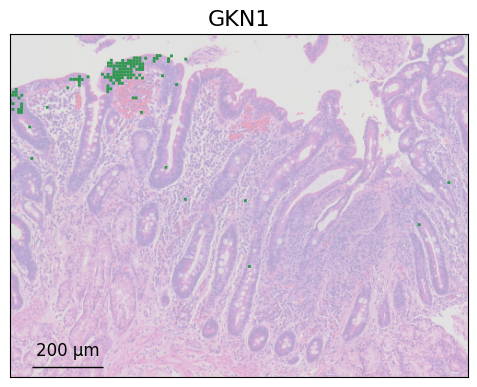

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


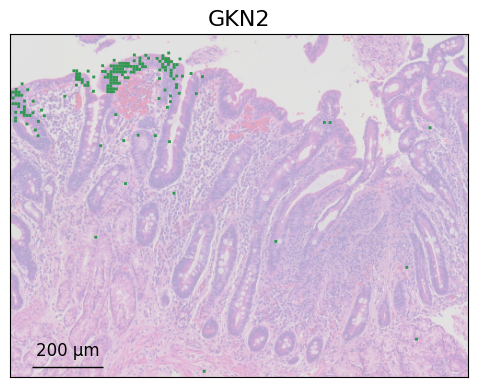

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


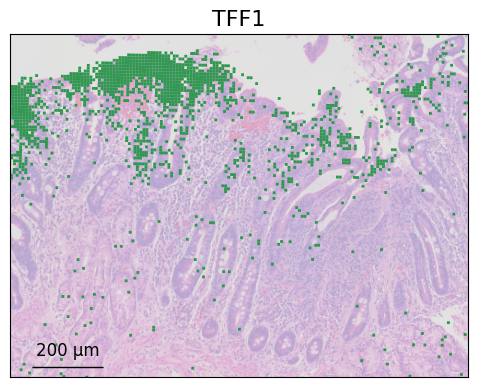

In [43]:
scalebar_y = -7600
start_bar_x = 14200
scalebar_length_um = 200
image_alpha = 0.4

genes_to_show = ["GKN1","GKN2","TFF1"]
gene_replacement = {
    "GKN1": "GKN1",# (Crypt marker)",
    "GKN2": "GKN2",# (Villus bottom marker)",
    "TFF1": "TFF1",# (Villus mid marker)",
}

for gene in genes_to_show:
    fig, ax = plt.subplots(1, 1, dpi=300, figsize=(5,5))
    cropped_sdata.pl.render_images('CeD_full_image', alpha=image_alpha).pl.render_shapes(
        'CeD_square_008um',color=gene, cmap=new_cmap_greens_alpha, method='matplotlib'
        ).pl.show(coordinate_systems='CeD', ax=ax, colorbar=False)
    plt.title(gene)

    # hide x and y ticks
    plt.xticks([])
    plt.yticks([])

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(-7510,-10490)
    ax.set_xlim(14010,17990)

    end_bar_x = start_bar_x + scalebar_length_um / scalefactors['microns_per_pixel']# plt.text(start_bar_x, scalebar_y - 100, f"{scalebar_length_um} µm", color='black', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 220, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    plt.tight_layout()
    export_path = f"{supp_met_save_path}/Fig_spatial_ced_st72_{gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

## Rotate celiac 67

In [44]:
rotated_sdata = sdata
# 2025/12/17 - try 67 deg
theta = (67/180) * math.pi#-(110/180) * math.pi# (<< this is 110)#3*math.pi / 2
rotation = Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

set_transformation(rotated_sdata.images['CeD_full_image'], rotation, to_coordinate_system="CeD")
set_transformation(rotated_sdata.shapes['CeD_square_008um'], rotation, to_coordinate_system="CeD")
if SHOW_FULL_HE_IMAGES:
    rotated_sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD')

In [45]:
# the following parameters were used in 110degs
# bb_xmin = 11000
# bb_ymin = -15000
# bb_w = 3000
# bb_h = 3000

bb_xmin = -10000
bb_ymin = 20000
bb_w = 3000
bb_h = 3000
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_sdata = rotated_sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="CeD",
)

cropped_sdata

SpatialData object
├── Images
│     └── 'CeD_full_image': DataTree[cyx] (3, 3934, 3933), (3, 1966, 1967), (3, 983, 983), (3, 491, 491), (3, 246, 246)
├── Shapes
│     └── 'CeD_square_008um': GeoDataFrame shape: (11650, 1) (2D shapes)
└── Tables
      └── 'square_008um': AnnData (11650, 18085)
with coordinate systems:
    ▸ 'CeD', with elements:
        CeD_full_image (Images), CeD_square_008um (Shapes)
    ▸ 'CeD_downscaled_hires', with elements:
        CeD_square_008um (Shapes)
    ▸ 'CeD_downscaled_lowres', with elements:
        CeD_square_008um (Shapes)

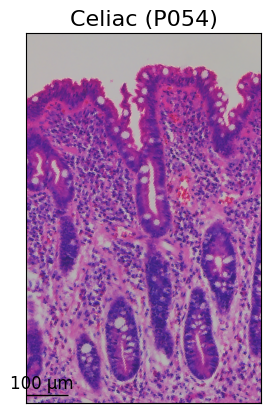

In [46]:
# Show H&E
scalebar_y = 22650
start_bar_x = -7450
scalebar_length_um = 100

fig, ax = plt.subplots(1, 1, dpi=300)

cropped_sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD', ax=ax)

plt.xticks([])
plt.yticks([])
plt.title("Celiac (P054)")

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_ylim(22700,20500)
ax.set_xlim(-7200,-8600)

end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']
plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
plt.show()

## Rotate celiac 180

In [47]:
rotated_sdata2 = sdata
theta = math.pi / 2
rotation = Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

set_transformation(rotated_sdata2.images['CeD_full_image'], rotation, to_coordinate_system="CeD")
set_transformation(rotated_sdata2.shapes['CeD_square_008um'], rotation, to_coordinate_system="CeD")
if SHOW_FULL_HE_IMAGES:
    rotated_sdata2.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD')

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


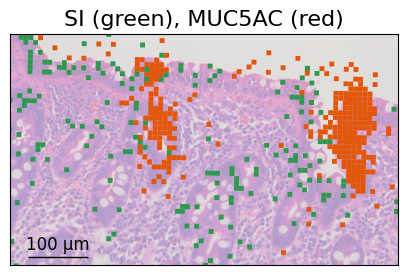

In [48]:
bb_xmin = -15000
bb_ymin = 16300
bb_w = 2100
bb_h = 1200
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_sdata2 = rotated_sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="CeD",
)

cropped_sdata2 = change_to_binary(cropped_sdata2)

pairs_dict = {
    "AQP10_SLC2A2": {"red": "MUC5AC", "green": "SI"},
    # "AQP10_REG1A": {"red": "REG1A", "green": "AQP10"},
}
red_cmap = new_cmap_oranges_alpha

green_cmap = new_cmap_greens_alpha
scalebar_y = 17450
start_bar_x = -14900
scalebar_length_um = 100

for key, gene_pair in pairs_dict.items():
    red_gene = gene_pair['red']
    green_gene = gene_pair['green']
    image_alpha = 0.45

    end_bar_x = start_bar_x + scalebar_length_um / scalefactors['microns_per_pixel']

    fig, ax = plt.subplots(1, 1,figsize=(5,5), dpi=300)
    cropped_sdata2.pl.render_images('CeD_full_image', alpha=image_alpha).pl.render_shapes('CeD_square_008um',color=red_gene, cmap=red_cmap, method='matplotlib').pl.render_shapes('CeD_square_008um',color=green_gene, cmap=green_cmap, method='matplotlib',).pl.show(coordinate_systems='CeD', ax=ax, colorbar=False)
    plt.xticks([])
    plt.yticks([])

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(17490,16310)
    ax.set_xlim(-14990, -13010)

    plt.title(f"{green_gene} (green), {red_gene} (red)")
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 110, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    # export
    export_path = f"{fig4_save_path}/Fig4_spatial_ced_st54_{green_gene}_{red_gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

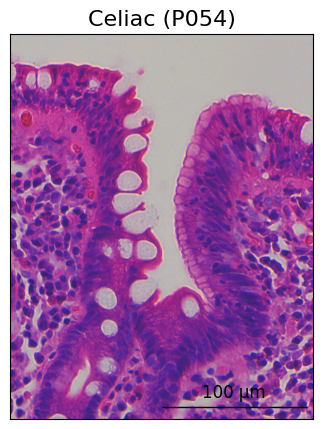

In [49]:
bb_xmin = -13750
bb_ymin = 16470
bb_w = 700
bb_h = 900
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_sdata2 = rotated_sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="CeD",
)

scalebar_y = 17275
start_bar_x = -13375
scalebar_length_um = 100
end_bar_x = start_bar_x + scalebar_length_um / scalefactors['microns_per_pixel']

fig, ax = plt.subplots(1, 1,figsize=(5,5), dpi=300)
cropped_sdata2.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD', ax=ax)
plt.xticks([])
plt.yticks([])

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_ylim(17300,16475)
ax.set_xlim(-13700,-13050)

plt.title("Celiac (P054)")
plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 50, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
# export
export_path = f"{fig4_save_path}/Fig4_metaplasia_he.pdf"
plt.savefig(export_path, bbox_inches='tight', dpi=300)
plt.show()

In [50]:
cropped_sdata2 = change_to_binary(cropped_sdata2)

### Plot two colors - celiac 180

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


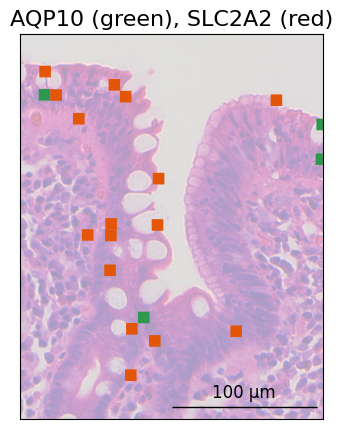

In [51]:
#dual stain MUC5AC 
scalebar_y = 17275
start_bar_x = -13375
scalebar_length_um = 100

pairs_dict = {
    "AQP10_SLC2A2": {"red": "SLC2A2", "green": "AQP10"},
    # "SI_GKN2": {"green": "SI", "red": "GKN2"},
}

red_cmap = new_cmap_oranges_alpha
green_cmap = new_cmap_greens_alpha

for key, gene_pair in pairs_dict.items():
    red_gene = gene_pair['red']
    green_gene = gene_pair['green']

# red_gene = "AQP10"
# green_gene= "SLC2A2"
    image_alpha = 0.45

    fig, ax = plt.subplots(1, 1, dpi=300, figsize=(5,5))
    cropped_sdata2.pl.render_images('CeD_full_image', alpha=image_alpha).pl.render_shapes('CeD_square_008um',color=green_gene, cmap=green_cmap, method='matplotlib',).pl.render_shapes('CeD_square_008um',color=red_gene, cmap=red_cmap, method='matplotlib').pl.show(coordinate_systems='CeD',ax=ax, colorbar=False)
    # cropped_sdata2.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD', ax=ax)

    plt.title(f"{green_gene} (green), {red_gene} (red)")

    # hide x and y ticks
    plt.xticks([])
    plt.yticks([])

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(17300,16475)
    ax.set_xlim(-13700,-13050)

    end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']# plt.text(start_bar_x, scalebar_y - 100, f"{scalebar_length_um} µm", color='black', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 50, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    # plt.tight_layout()
    export_path = f"{fig4_save_path}/Fig4_metaplasia_{green_gene}_{red_gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

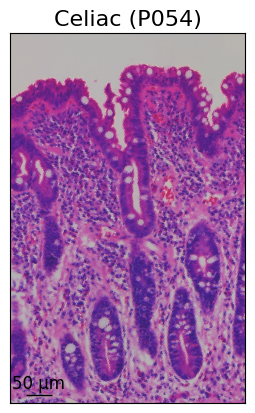

In [52]:
# Show H&E
scalebar_y = 22650
start_bar_x = -7450
scalebar_length_um = 50

fig, ax = plt.subplots(1, 1, dpi=300)

cropped_sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD', ax=ax)

plt.xticks([])
plt.yticks([])
plt.title("Celiac (P054)")

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_ylim(22700,20500)
ax.set_xlim(-7200,-8600)

end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']
plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top')
plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
plt.show()

In [53]:
# if folder exist - delete and write new
if os.path.exists(os.getcwd()+'/cropped_sdata_ced.zarr'):
    shutil.rmtree(os.getcwd()+'/cropped_sdata_ced.zarr')
if os.path.exists(os.getcwd()+'/cropped_sdata_ct.zarr'):
    shutil.rmtree(os.getcwd()+'/cropped_sdata_ct.zarr')

# change to log transformed
cropped_sdata = change_to_log_normalized(cropped_sdata)
cropped_rotated_sdata_ct = change_to_log_normalized(cropped_rotated_sdata_ct)
# export
cropped_sdata.write(os.getcwd()+'/cropped_sdata_ced.zarr', overwrite=True)
cropped_rotated_sdata_ct.write(os.getcwd()+'/cropped_sdata_ct.zarr', overwrite=True)
# back to binary
cropped_sdata = change_to_binary(cropped_sdata)
cropped_rotated_sdata_ct = change_to_binary(cropped_rotated_sdata_ct)

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /mnt/x/common/Joint_projects/spatial_celiac/analysis_260112/cropped_sdata_ced.zarr                        
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /mnt/x/common/Joint_projects/spatial_celiac/analysis_260112/cropped_sdata_ct.zarr                         


In [54]:
cropped_sdata = change_to_binary(cropped_sdata)

### Plot multiple genes - celiac 67

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


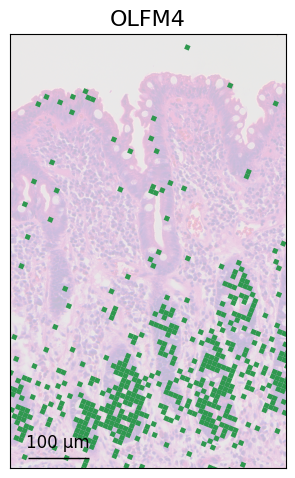

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


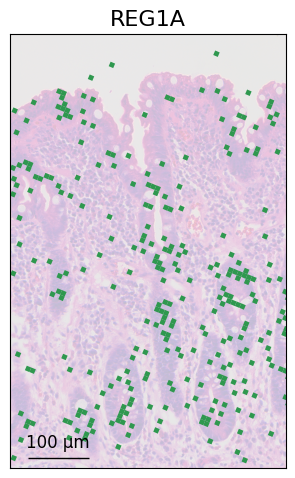

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


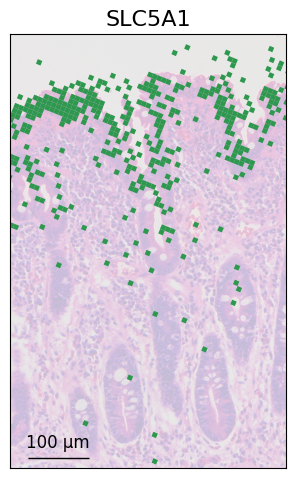

In [55]:
scalebar_y = 22650
start_bar_x = -7600
scalebar_length_um = 100

genes_to_show = ["OLFM4","REG1A","SLC5A1"]
gene_replacement = {
    "OLFM4": "OLFM4",# (Crypt marker)",
    "REG1A": "REG1A",# (Villus bottom marker)",
    "SLC5A1": "SLC5A1",# (Villus mid marker)",
}
for gene in genes_to_show:
    fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=300)
    cropped_sdata.pl.render_images('CeD_full_image', alpha=0.3).pl.render_shapes(
        'CeD_square_008um',color=gene, cmap=new_cmap_greens_alpha, method='matplotlib'
        ).pl.show(coordinate_systems='CeD', ax=ax, colorbar=False)
    plt.title(gene)

    # hide x and y ticks
    plt.xticks([])
    plt.yticks([])
    # plt.title(gene_replacement.get(gene, gene))

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(22700,20500)
    ax.set_xlim(-7200,-8600)
    
    end_bar_x = start_bar_x + scalebar_length_um / scalefactors['microns_per_pixel']
    plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top',)
    plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
    plt.tight_layout()
    # export
    export_path = f"{fig2_save_path}/fig2_spatial_CeD_{gene}.pdf"
    plt.savefig(export_path, bbox_inches='tight', dpi=300)
    plt.show()

/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `CeD_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/talbarka/miniconda3/envs/spatial_ced_2/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


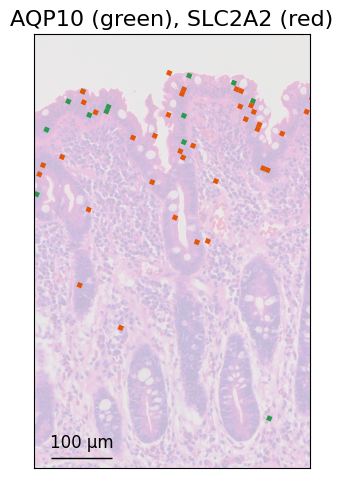

In [56]:
scalebar_y = 22650
start_bar_x = -7600
scalebar_length_um = 100

pairs_dict = {
    "AQP10_SLC2A2": {"red": "SLC2A2", "green": "AQP10"},
    # "AQP10_REG1A": {"red": "REG1A", "green": "AQP10"},
}

red_cmap = new_cmap_oranges_alpha
green_cmap = new_cmap_greens_alpha

for image_alpha in [0.3]:
    for key, gene_pair in pairs_dict.items():
        red_gene = gene_pair['red']
        green_gene = gene_pair['green']
        # red_gene = "REG1A"
        # green_gene = "AQP10"
        # image_alpha = 0.45

        fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=300)
        cropped_sdata.pl.render_images('CeD_full_image', alpha=image_alpha).pl.render_shapes('CeD_square_008um',color=green_gene, cmap=green_cmap, method='matplotlib').pl.render_shapes('CeD_square_008um',color=red_gene, cmap=red_cmap, method='matplotlib').pl.show(coordinate_systems='CeD',ax=ax, colorbar=False)

        plt.title(f"{green_gene} (green), {red_gene} (red)")

        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(22700,20500)
        ax.set_xlim(-7200,-8600)
        plt.xticks([])
        plt.yticks([])

        end_bar_x = start_bar_x + scalebar_length_um / scalefactors_ct['microns_per_pixel']
        plt.text((start_bar_x+end_bar_x)/2, scalebar_y - 120, f"{scalebar_length_um} µm", color='black', fontsize=12, ha='center', va='top',)
        plt.plot([start_bar_x, end_bar_x], [scalebar_y, scalebar_y], color='black', linewidth=1, solid_capstyle='butt')
        plt.tight_layout()
        # export
        export_path = f"{fig2_save_path}/fig2_spatial_ced_{green_gene}_{red_gene}.pdf"
        plt.savefig(export_path, bbox_inches='tight', dpi=300)
        plt.show()

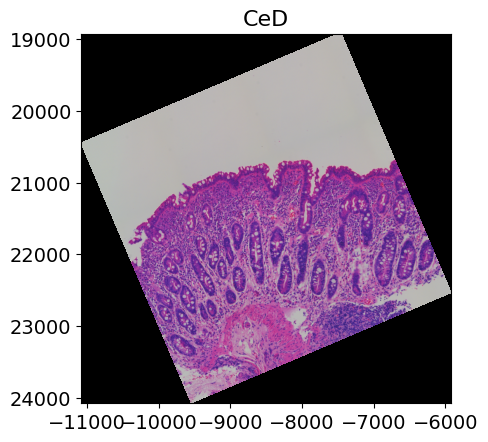

In [49]:
cropped_sdata
fig, ax = plt.subplots(1, 1, dpi=300)
cropped_sdata.pl.render_images('CeD_full_image').pl.show(coordinate_systems='CeD', ax=ax)
plt.show()

In [50]:
# bb_xmin = 16250
# bb_ymin = -10100
# bb_w = 850
# bb_h = 850
# bb_xmax = bb_xmin + bb_w
# bb_ymax = bb_ymin + bb_h

# cropped_sdata2 = cropped_sdata.query.bounding_box(
#     axes=["x", "y"],
#     min_coordinate=[bb_xmin, bb_ymin],
#     max_coordinate=[bb_xmax, bb_ymax],
#     target_coordinate_system="CeD",
# )


In [57]:
print(session_info2.session_info(dependencies=True))

spatialdata	0.5.0
spatialdata-io	0.3.0
spatialdata-plot	0.2.12
matplotlib	3.10.6
numpy	2.3.3
pandas	2.3.3
scanpy	1.11.4
seaborn	0.13.2
pillow	11.3.0
scipy	1.16.2
anndata	0.12.2
----	----
jaraco.functools	4.0.1
pydantic-extra-types	2.10.5
setuptools	78.1.1
executing	2.2.1
ipython	9.6.0
jupyter_core	5.8.1
scikit-learn	1.7.2
dask	2024.11.2
geopandas	1.1.1
pyproj	3.7.2
cloudpickle	3.1.1
fsspec	2025.9.0
kiwisolver	1.4.9
wrapt	1.17.3
matplotlib-scalebar	0.9.0
joblib	1.5.2
Jinja2	3.1.6
leidenalg	0.10.2
pyarrow	21.0.0
lazy_loader	0.4
jaraco.context	5.3.0
pydantic_core	2.33.2
parso	0.8.5
fonttools	4.60.1
pydantic	2.11.9
asciitree	0.3.3
ome-types	0.6.1 (ome_types: 0.6.1, xsdata_pydantic_basemodel: 0.1.0)
pyct	0.6.0
threadpoolctl	3.6.0
requests	2.32.5
dask-image	2024.5.3
traitlets	5.14.3
FlowIO	1.4.0
plotly	6.3.0
urllib3	2.5.0
stack-data	0.6.3
numba	0.62.1
asttokens	3.0.0
slicerator	1.1.0
shapely	2.1.2
numpydoc	1.9.0
xarray	2025.9.1
imageio	2.37.0
sphinxcontrib-serializinghtml	2.0.0
matplotlib-in